In [3]:
import pandas as pd

# Charger les données
df = pd.read_csv(r"C:\Users\mathe\OneDrive\Bureau\M1\S2\ML_project\projet\ValeursFoncieres\ValeursFoncieresFrance.csv", dtype="str")


# Garder uniquement les colonnes nécessaires
df = df[[
    'date_mutation',
    'nature_mutation',
    'valeur_fonciere',
    'code_postal',
    'code_commune',
    'nom_commune',
    'code_departement',
    'nature_culture',
    'surface_terrain',
    'longitude',
    'latitude',
    'section_prefixe',
    "type_local",
    "surface_reelle_bati"
]]

# Convertir les colonnes en numérique pour le calcul
df['valeur_fonciere'] = pd.to_numeric(df['valeur_fonciere'], errors='coerce')
df['surface_terrain'] = pd.to_numeric(df['surface_terrain'], errors='coerce')
df['surface_reelle_bati'] = pd.to_numeric(df['surface_reelle_bati'], errors='coerce')

# Supprimer les lignes avec des valeurs manquantes ou zéro
df.dropna(subset=['valeur_fonciere', 'surface_reelle_bati'], inplace=True)
print(df.shape[0])
df.drop_duplicates(subset=['longitude', 'latitude', 'valeur_fonciere', 'surface_reelle_bati'], inplace=True)
print(df.shape[0], "sans les doublons")

types_autorises = [
    "Vente",
    "Vente en l'état futur d'achèvement",
    "Vente terrain à bâtir"
]

df = df[df['nature_mutation'].isin(types_autorises)]

print(df.shape[0], "que les ventes ")
df = df[df['surface_reelle_bati'] > 1]
print("Valeur sans les terrain de 1m² : ", df.shape[0]) 
df = df[df['valeur_fonciere'] > 1]
print("Valeur sans les terrain de 1€ : ", df.shape[0])






3931533
3531254 sans les doublons
3531254 que les ventes 
Valeur sans les terrain de 1m² :  3530739
Valeur sans les terrain de 1€ :  3528249


Selectionner les bonnes colonnes

In [4]:
types_autorises = [
    "Vente"
]

df = df[df['nature_mutation'].isin(types_autorises)]



df_maison = df[df['type_local'] == 'Maison']
df_appartement = df[df['type_local'] == 'Appartement']


In [5]:
df.to_csv(r"data/data_frame_original.csv")
df_maison.to_csv(r"data/data_frame_maison.csv")
df_appartement.to_csv(r"data/data_frame_appartement.csv")


In [1]:
import pandas as pd
#df = pd.read_csv(r"data/data_frame_original.csv")
df_maison = pd.read_csv(r"data/data_frame_maison.csv")
df_appartement = pd.read_csv(r"data/data_frame_appartement.csv")
print(df_maison.shape[0])
print(df_appartement.shape[0])

C:\Users\mathe\AppData\Local\Temp\ipykernel_4248\2906260083.py:3: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_maison = pd.read_csv(r"data/data_frame_maison.csv")
C:\Users\mathe\AppData\Local\Temp\ipykernel_4248\2906260083.py:4: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_appartement = pd.read_csv(r"data/data_frame_appartement.csv")


1956705
1486699


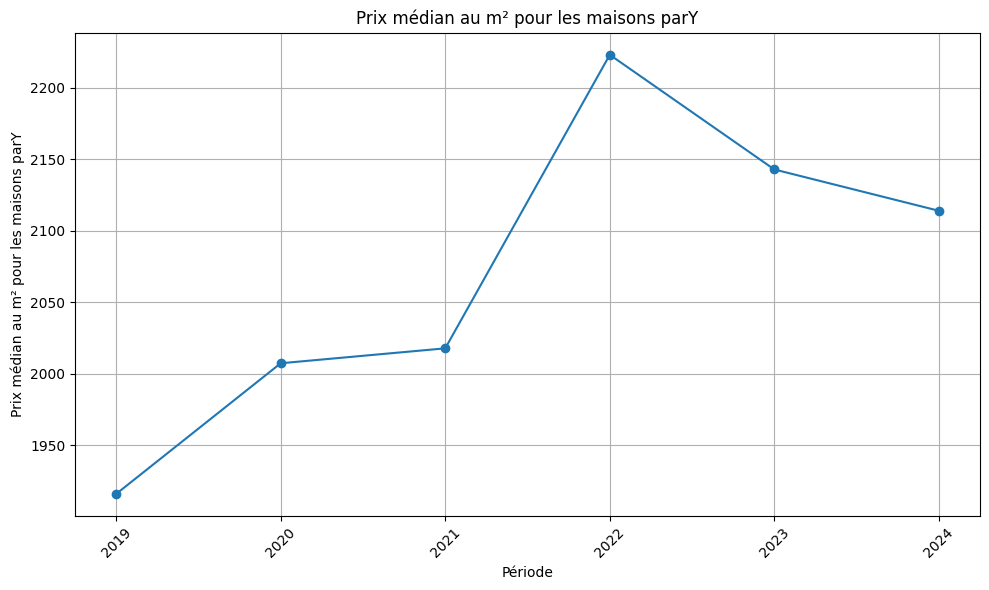

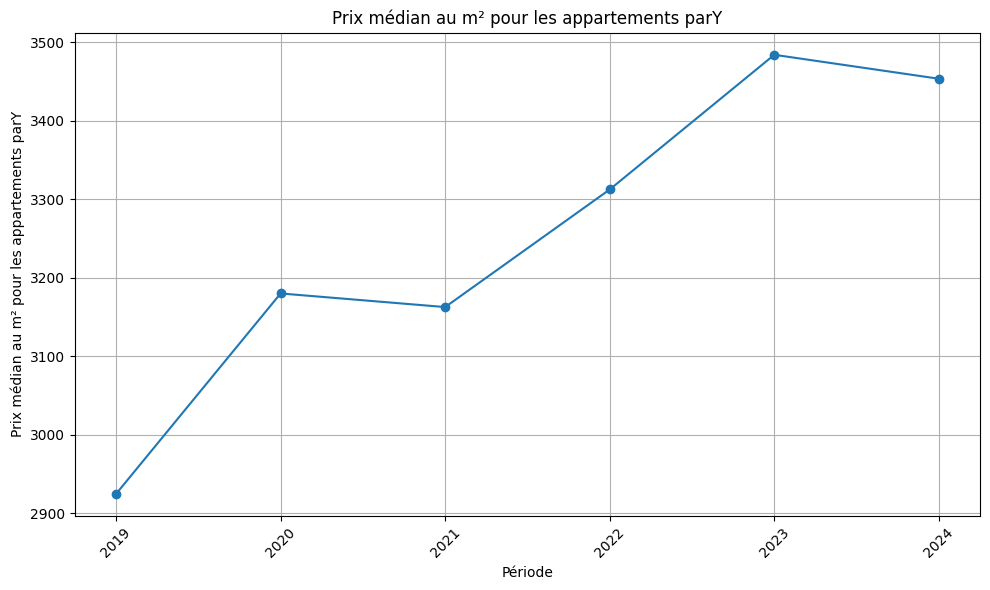

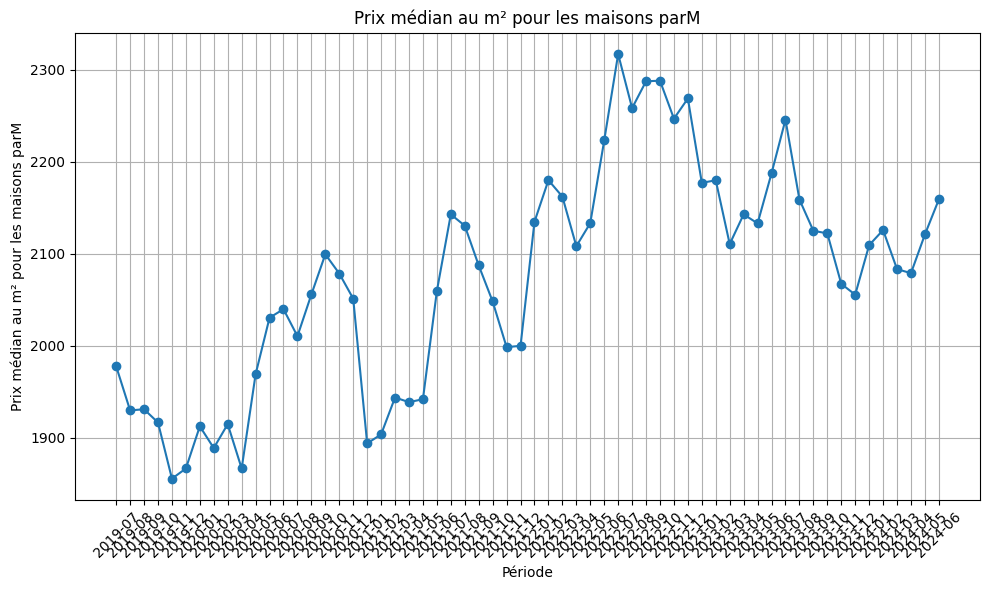

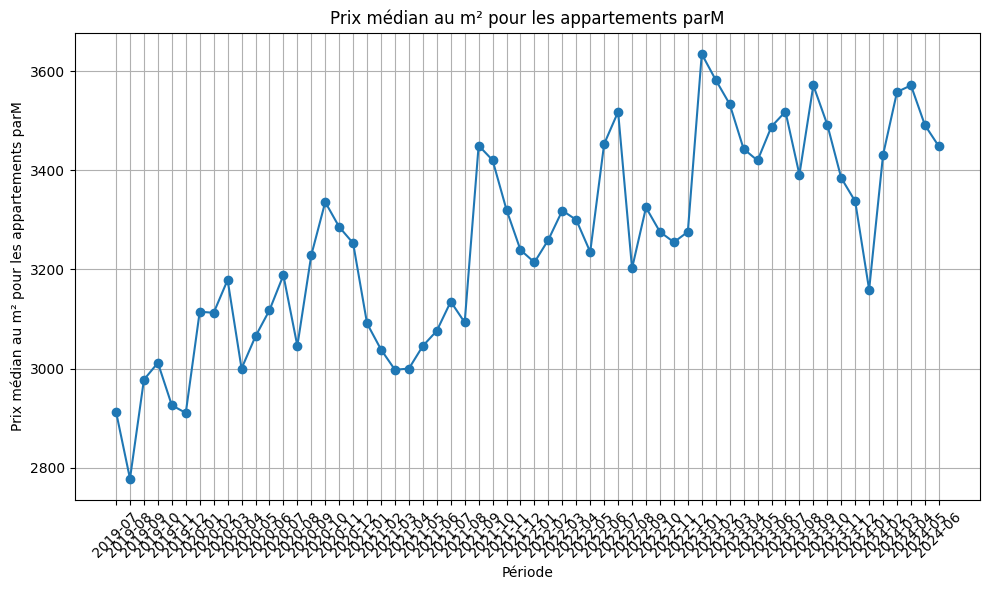

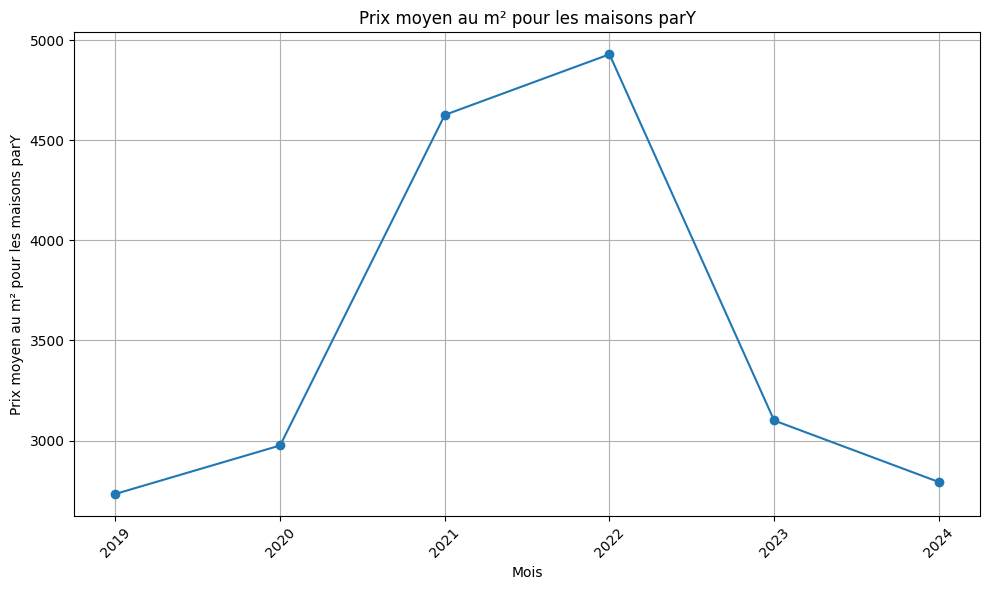

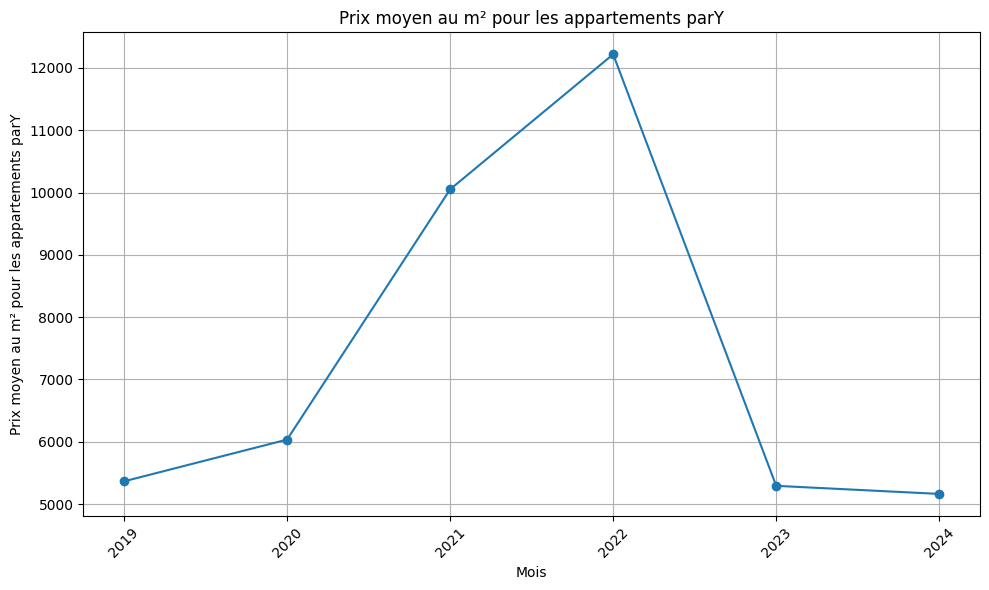

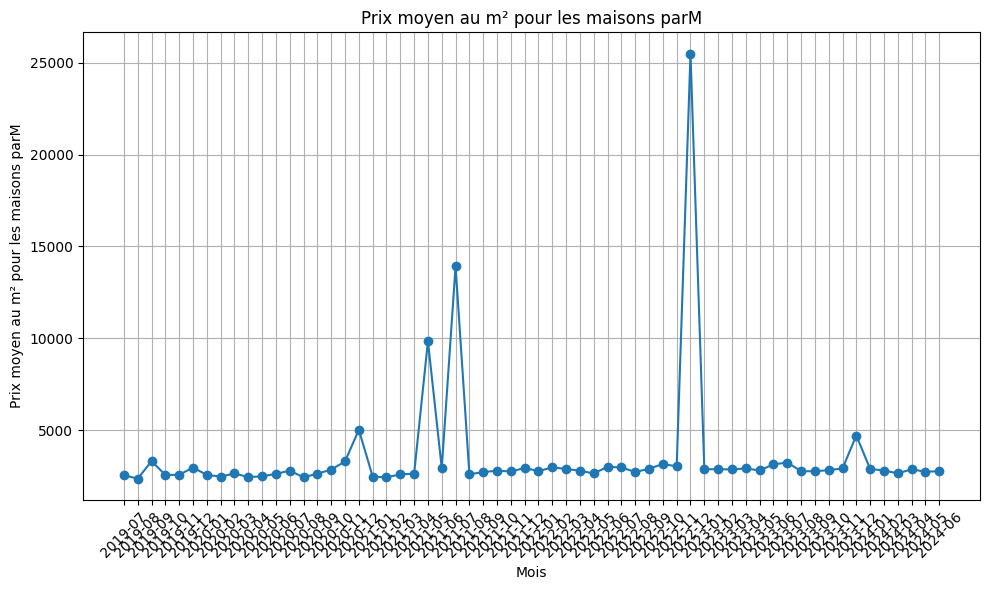

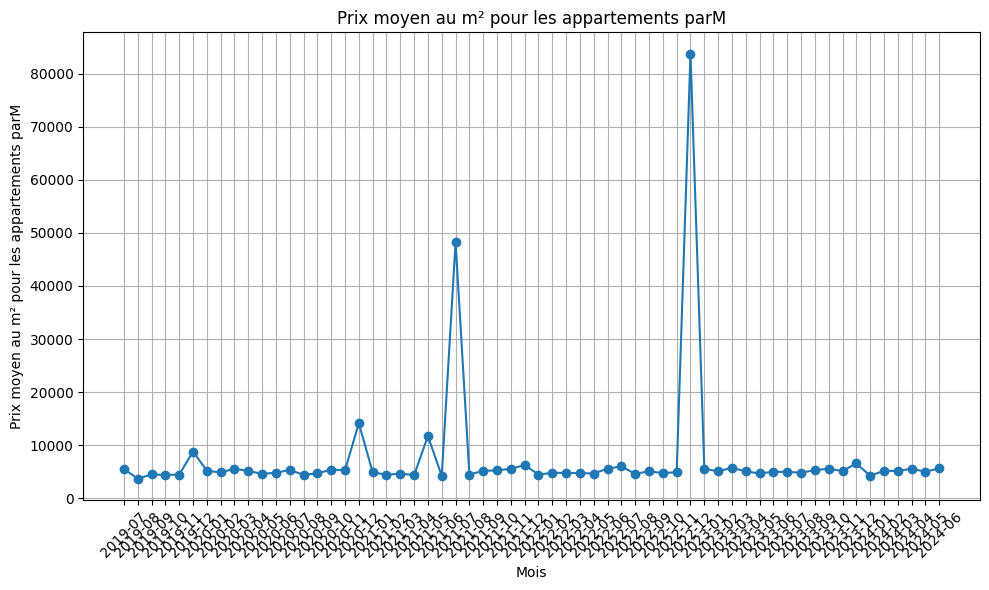

In [2]:
import matplotlib.pyplot as plt

def representation_du_prix_metre_carre_median(df, titre="Prix médian au m² par ", temps="Y"):
    # Convertir la colonne 'date_mutation' en format datetime
    df['date_mutation'] = pd.to_datetime(df['date_mutation'], errors='coerce')

    # Calculer le prix au mètre carré
    df['prix_m2'] = df['valeur_fonciere'] / df['surface_reelle_bati']

    # Extraire le mois (ou autre période) selon 'temps'
    df['mois'] = df['date_mutation'].dt.to_period(temps)

    # Calculer le prix médian du m² par période
    prix_median_par_mois = df.groupby('mois')['prix_m2'].median().reset_index()

    # Convertir la période en chaîne de caractères pour l'affichage
    prix_median_par_mois['mois_str'] = prix_median_par_mois['mois'].astype(str)

    # Tracer le graphique
    plt.figure(figsize=(10, 6))
    plt.plot(prix_median_par_mois['mois_str'], prix_median_par_mois['prix_m2'], marker='o', linestyle='-')
    plt.xlabel("Période")
    plt.ylabel(titre + temps)
    plt.title(titre + temps)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


def representation_du_prix_metre_carre(df, titre="Prix moyen au m² par ", temps="Y"):
    # Convertir la colonne 'date_mutation' en format datetime
    df['date_mutation'] = pd.to_datetime(df['date_mutation'], errors='coerce')

    # Calculer le prix au mètre carré
    df['prix_m2'] = df['valeur_fonciere'] / df['surface_reelle_bati']

    # Extraire le mois au format 'YYYY-MM'
    df['mois'] = df['date_mutation'].dt.to_period(temps)

    # Calculer le prix moyen du m² par mois
    prix_moyen_par_mois = df.groupby('mois')['prix_m2'].mean().reset_index()

    # Convertir le mois en chaîne de caractères pour un meilleur affichage sur l'axe des abscisses
    prix_moyen_par_mois['mois_str'] = prix_moyen_par_mois['mois'].astype(str)

    # Tracer le graphique
    plt.figure(figsize=(10, 6))
    plt.plot(prix_moyen_par_mois['mois_str'], prix_moyen_par_mois['prix_m2'], marker='o', linestyle='-')
    plt.xlabel("Mois")
    plt.ylabel(titre + temps)
    plt.title(titre + temps)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
def representation_du_prix_metre_carre_normaliser(df, titre="Prix moyen au m² par ", temps="Y"):
    import matplotlib.pyplot as plt
    
    # Convertir la colonne 'date_mutation' en format datetime
    df['date_mutation'] = pd.to_datetime(df['date_mutation'], errors='coerce')

    # Calculer le prix au mètre carré
    df['prix_m2'] = df['valeur_fonciere'] / df['surface_reelle_bati']

    # Extraire la période (mois, année, etc.) selon le paramètre 'temps'
    df['mois'] = df['date_mutation'].dt.to_period(temps)

    # Calculer le prix moyen du m² par période
    prix_moyen_par_mois = df.groupby('mois')['prix_m2'].mean().reset_index()

    # Normaliser l'évolution en divisant par la première valeur
    premiere_valeur = prix_moyen_par_mois['prix_m2'].iloc[0]
    prix_moyen_par_mois['prix_norm'] = prix_moyen_par_mois['prix_m2'] / premiere_valeur

    # Convertir la période en chaîne de caractères pour un meilleur affichage
    prix_moyen_par_mois['mois_str'] = prix_moyen_par_mois['mois'].astype(str)

    # Tracer le graphique normalisé
    plt.figure(figsize=(10, 6))
    plt.plot(prix_moyen_par_mois['mois_str'], prix_moyen_par_mois['prix_norm'], marker='o', linestyle='-')
    plt.xlabel("Période")
    plt.ylabel("Evolution normalisée (première valeur = 1)")
    plt.title(titre + " " + temps + " - Normalisé")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

representation_du_prix_metre_carre_median(df_maison, "Prix médian au m² pour les maisons par")
representation_du_prix_metre_carre_median(df_appartement, "Prix médian au m² pour les appartements par")
representation_du_prix_metre_carre_median(df_maison, "Prix médian au m² pour les maisons par", "M")
representation_du_prix_metre_carre_median(df_appartement, "Prix médian au m² pour les appartements par", "M")
representation_du_prix_metre_carre(df_maison, "Prix moyen au m² pour les maisons par")
representation_du_prix_metre_carre(df_appartement, "Prix moyen au m² pour les appartements par")
representation_du_prix_metre_carre(df_maison, "Prix moyen au m² pour les maisons par", "M")
representation_du_prix_metre_carre(df_appartement, "Prix moyen au m² pour les appartements par", "M")

In [8]:
print(df_maison.shape[0])
print(df_appartement.shape[0])

2177589
85527


Nombre de maison sans anomalies 293
Nombre d'appartement sans anomalies 315


C:\Users\mathe\AppData\Local\Temp\ipykernel_4248\3193673745.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_mutation'] = pd.to_datetime(df['date_mutation'], errors='coerce')
C:\Users\mathe\AppData\Local\Temp\ipykernel_4248\3193673745.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prix_m2'] = df['valeur_fonciere'] / df['surface_reelle_bati']
C:\Users\mathe\AppData\Local\Temp\ipykernel_4248\3193673745.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

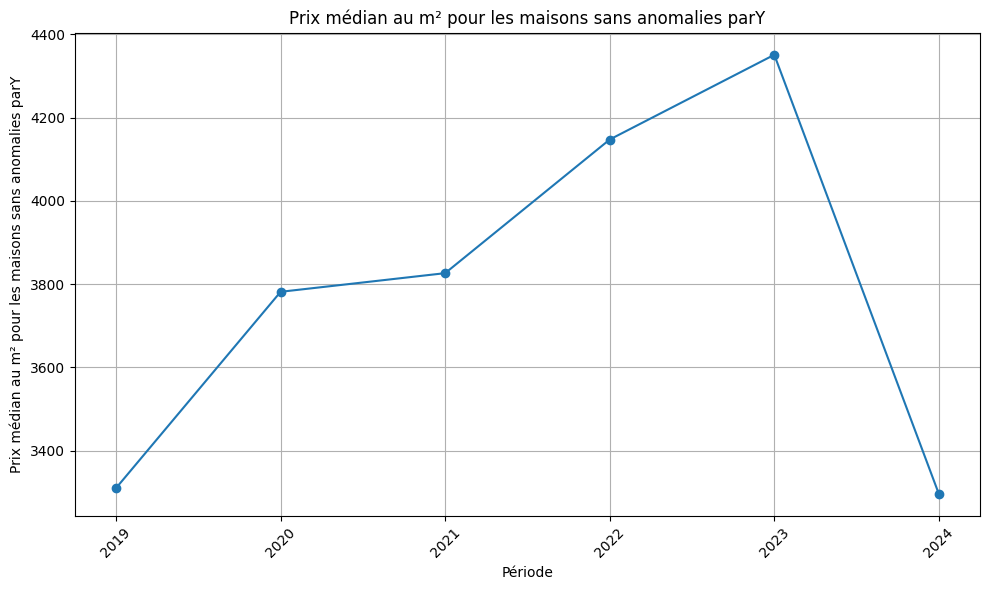

C:\Users\mathe\AppData\Local\Temp\ipykernel_4248\3193673745.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_mutation'] = pd.to_datetime(df['date_mutation'], errors='coerce')
C:\Users\mathe\AppData\Local\Temp\ipykernel_4248\3193673745.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prix_m2'] = df['valeur_fonciere'] / df['surface_reelle_bati']
C:\Users\mathe\AppData\Local\Temp\ipykernel_4248\3193673745.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

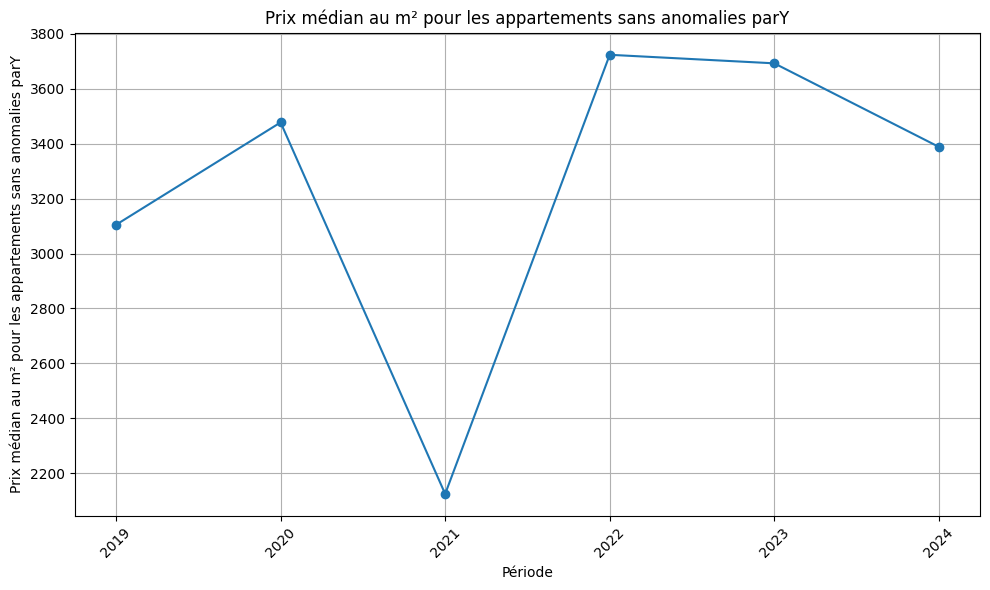

C:\Users\mathe\AppData\Local\Temp\ipykernel_4248\3193673745.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_mutation'] = pd.to_datetime(df['date_mutation'], errors='coerce')
C:\Users\mathe\AppData\Local\Temp\ipykernel_4248\3193673745.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prix_m2'] = df['valeur_fonciere'] / df['surface_reelle_bati']
C:\Users\mathe\AppData\Local\Temp\ipykernel_4248\3193673745.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

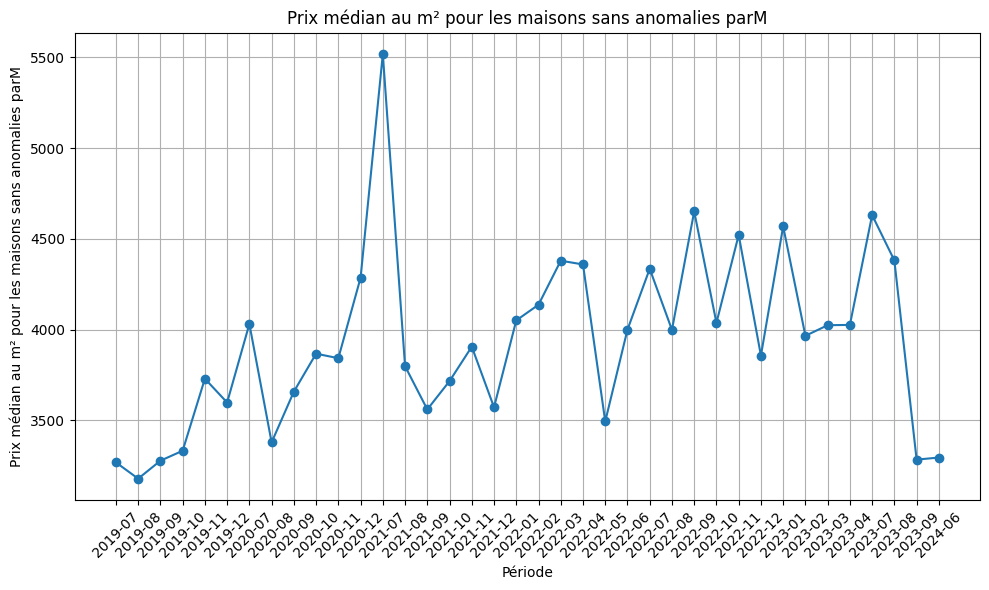

C:\Users\mathe\AppData\Local\Temp\ipykernel_4248\3193673745.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_mutation'] = pd.to_datetime(df['date_mutation'], errors='coerce')
C:\Users\mathe\AppData\Local\Temp\ipykernel_4248\3193673745.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prix_m2'] = df['valeur_fonciere'] / df['surface_reelle_bati']
C:\Users\mathe\AppData\Local\Temp\ipykernel_4248\3193673745.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

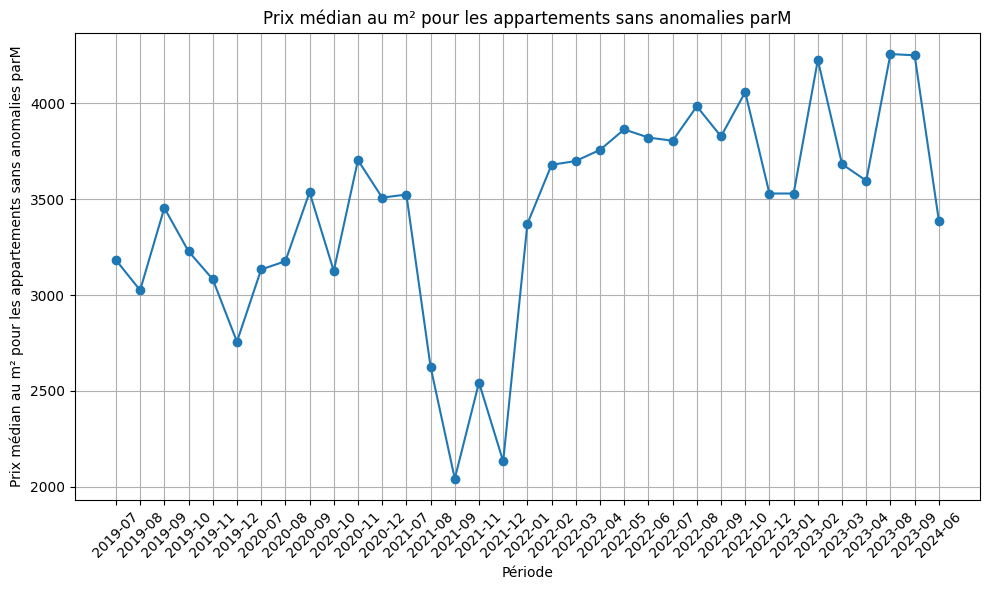

C:\Users\mathe\AppData\Local\Temp\ipykernel_4248\3193673745.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_mutation'] = pd.to_datetime(df['date_mutation'], errors='coerce')
C:\Users\mathe\AppData\Local\Temp\ipykernel_4248\3193673745.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prix_m2'] = df['valeur_fonciere'] / df['surface_reelle_bati']
C:\Users\mathe\AppData\Local\Temp\ipykernel_4248\3193673745.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

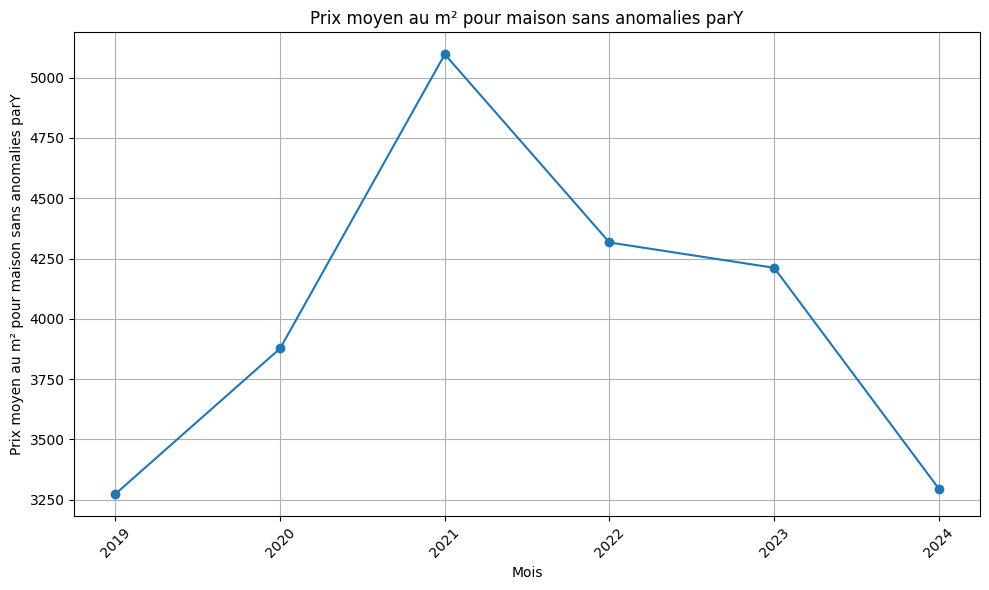

C:\Users\mathe\AppData\Local\Temp\ipykernel_4248\3193673745.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_mutation'] = pd.to_datetime(df['date_mutation'], errors='coerce')
C:\Users\mathe\AppData\Local\Temp\ipykernel_4248\3193673745.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prix_m2'] = df['valeur_fonciere'] / df['surface_reelle_bati']
C:\Users\mathe\AppData\Local\Temp\ipykernel_4248\3193673745.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

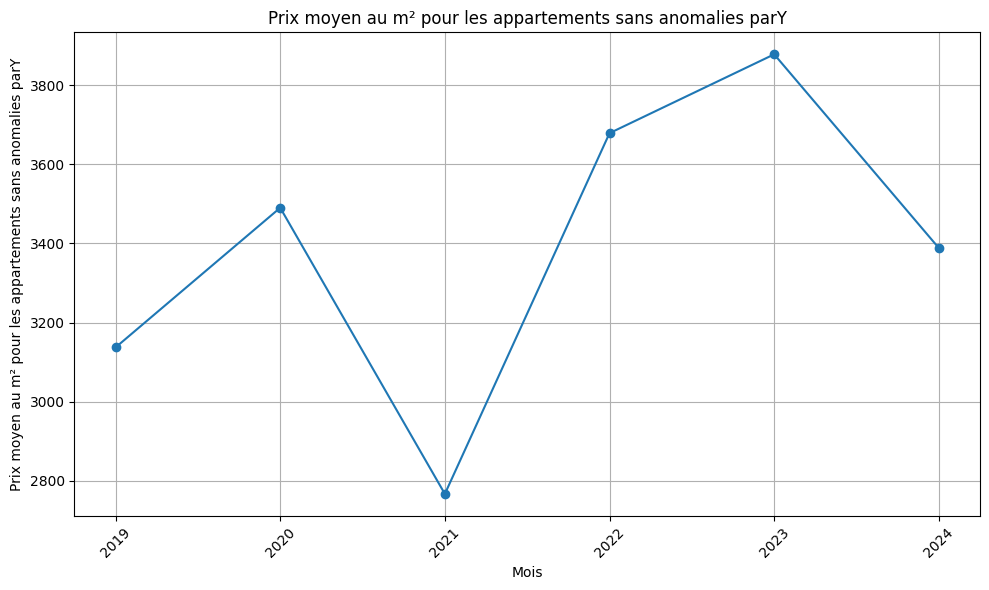

C:\Users\mathe\AppData\Local\Temp\ipykernel_4248\3193673745.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_mutation'] = pd.to_datetime(df['date_mutation'], errors='coerce')
C:\Users\mathe\AppData\Local\Temp\ipykernel_4248\3193673745.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prix_m2'] = df['valeur_fonciere'] / df['surface_reelle_bati']
C:\Users\mathe\AppData\Local\Temp\ipykernel_4248\3193673745.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

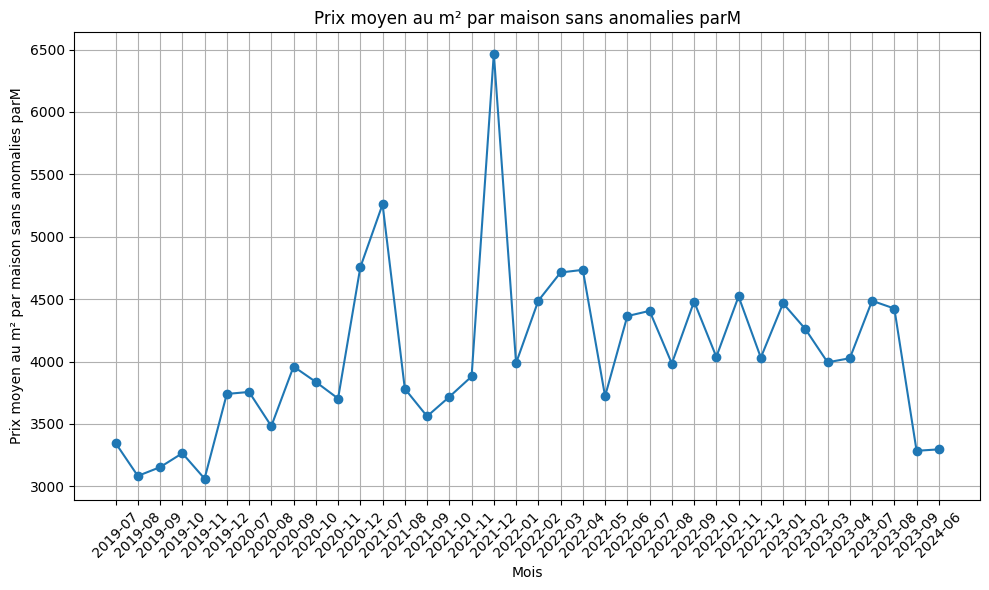

C:\Users\mathe\AppData\Local\Temp\ipykernel_4248\3193673745.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_mutation'] = pd.to_datetime(df['date_mutation'], errors='coerce')
C:\Users\mathe\AppData\Local\Temp\ipykernel_4248\3193673745.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prix_m2'] = df['valeur_fonciere'] / df['surface_reelle_bati']
C:\Users\mathe\AppData\Local\Temp\ipykernel_4248\3193673745.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

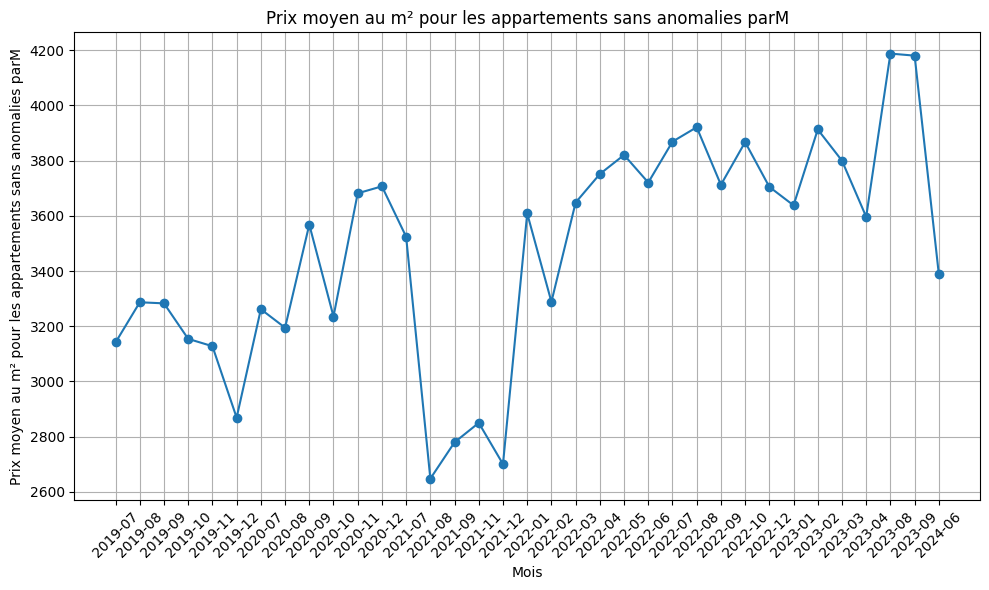

C:\Users\mathe\AppData\Local\Temp\ipykernel_4248\3193673745.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_mutation'] = pd.to_datetime(df['date_mutation'], errors='coerce')
C:\Users\mathe\AppData\Local\Temp\ipykernel_4248\3193673745.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prix_m2'] = df['valeur_fonciere'] / df['surface_reelle_bati']
C:\Users\mathe\AppData\Local\Temp\ipykernel_4248\3193673745.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

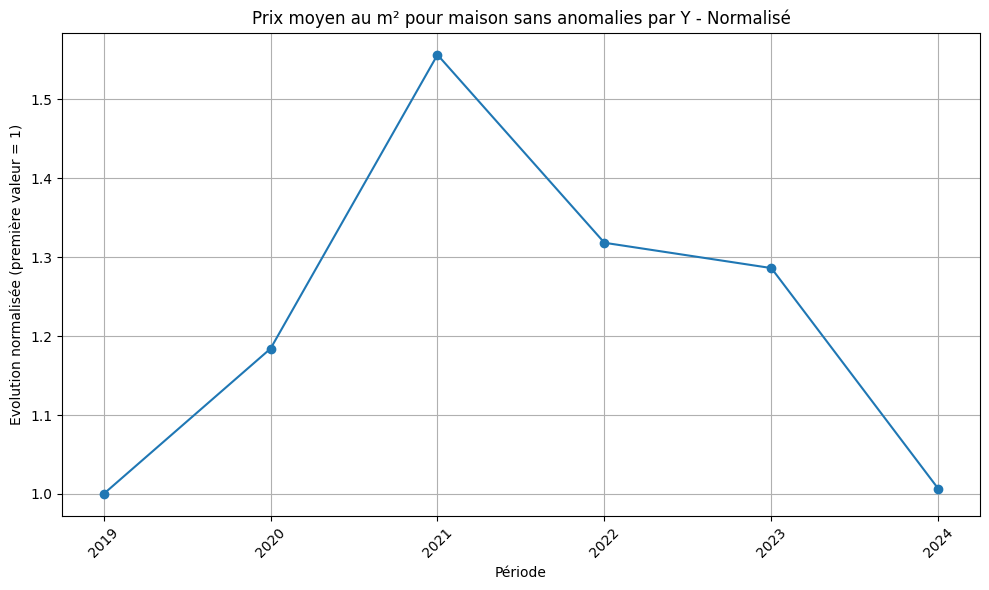

C:\Users\mathe\AppData\Local\Temp\ipykernel_4248\3193673745.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_mutation'] = pd.to_datetime(df['date_mutation'], errors='coerce')
C:\Users\mathe\AppData\Local\Temp\ipykernel_4248\3193673745.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prix_m2'] = df['valeur_fonciere'] / df['surface_reelle_bati']
C:\Users\mathe\AppData\Local\Temp\ipykernel_4248\3193673745.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

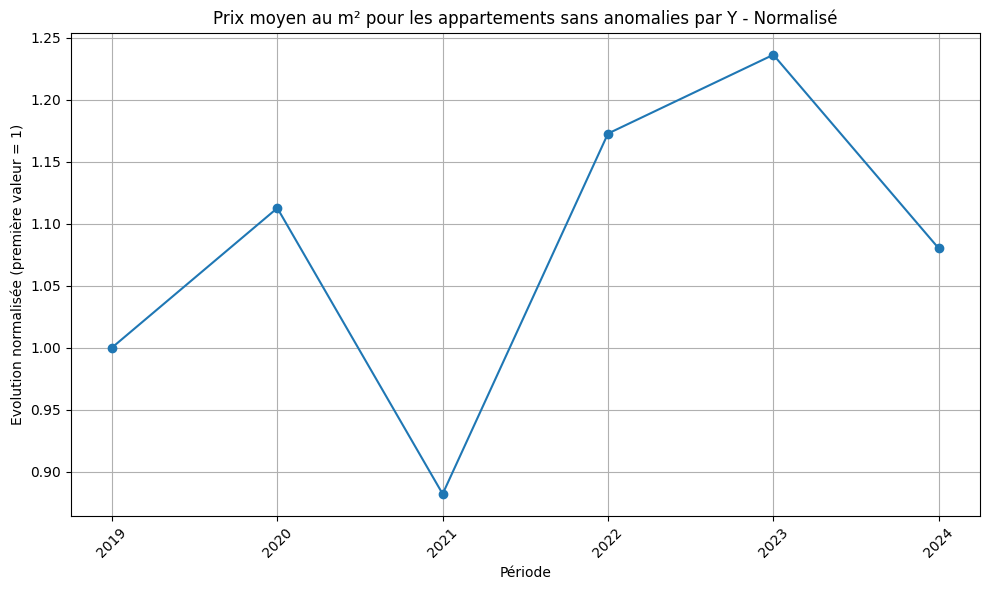

C:\Users\mathe\AppData\Local\Temp\ipykernel_4248\3193673745.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_mutation'] = pd.to_datetime(df['date_mutation'], errors='coerce')
C:\Users\mathe\AppData\Local\Temp\ipykernel_4248\3193673745.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prix_m2'] = df['valeur_fonciere'] / df['surface_reelle_bati']
C:\Users\mathe\AppData\Local\Temp\ipykernel_4248\3193673745.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

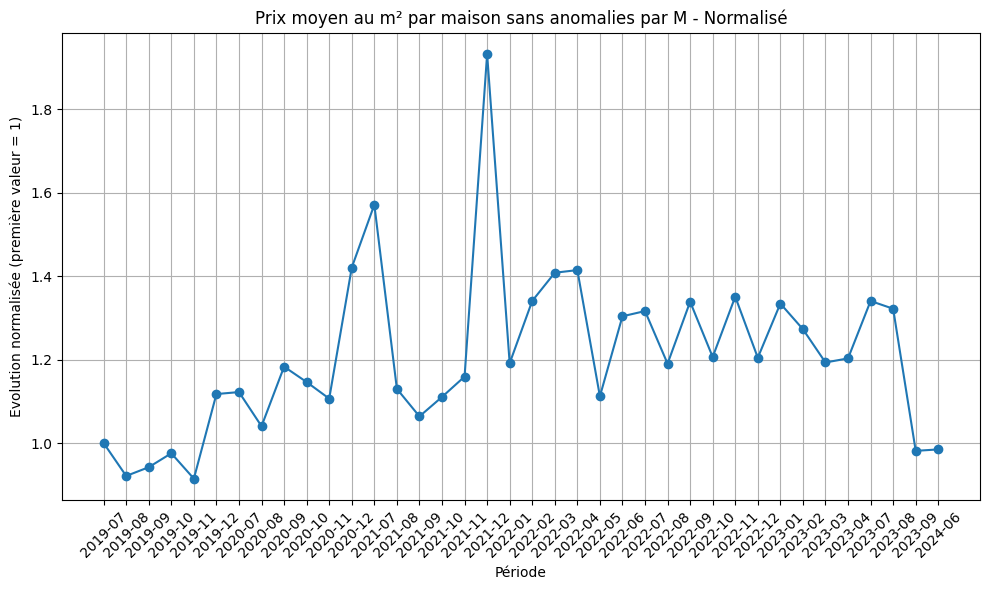

C:\Users\mathe\AppData\Local\Temp\ipykernel_4248\3193673745.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_mutation'] = pd.to_datetime(df['date_mutation'], errors='coerce')
C:\Users\mathe\AppData\Local\Temp\ipykernel_4248\3193673745.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prix_m2'] = df['valeur_fonciere'] / df['surface_reelle_bati']
C:\Users\mathe\AppData\Local\Temp\ipykernel_4248\3193673745.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

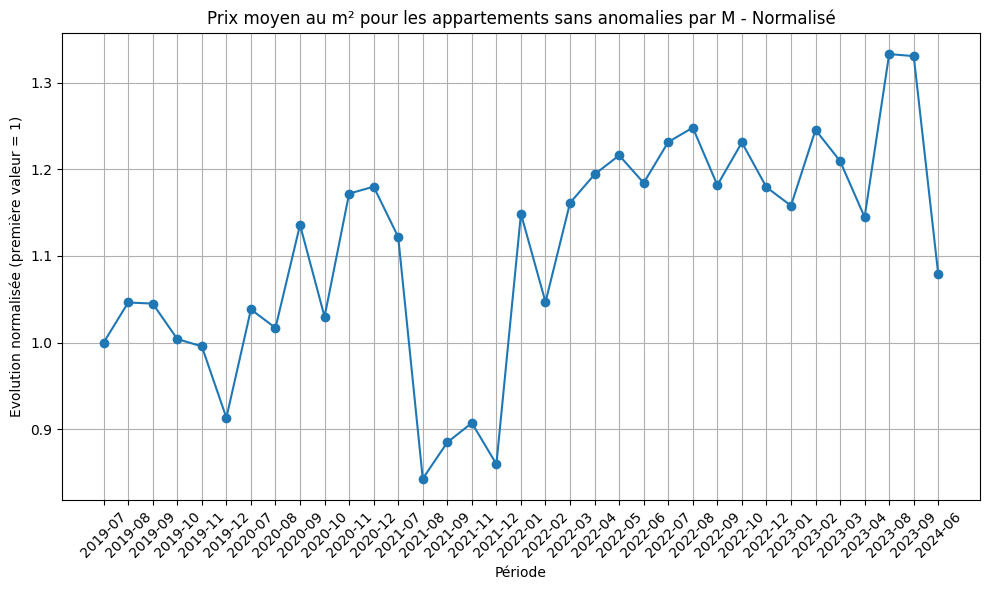

Nombre d'anomalie maison 3
4


In [5]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

df_maison = df_maison[df_maison["nom_commune"] == "Cesson-Sévigné"]
df_appartement = df_appartement[df_appartement["nom_commune"] == "Cesson-Sévigné"]





def detecter_anomalies(df):
    # Sélectionner uniquement les colonnes numériques
    features = df[['surface_terrain', 'valeur_fonciere']]

    # Normaliser les données
    scaler = StandardScaler()
    features = scaler.fit_transform(features)

    # Appliquer Isolation Forest
    clf = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
    df['anomaly'] = clf.fit_predict(features)

    # Les valeurs prédites -1 sont considérées comme des anomalies
    anomalies = df[df['anomaly'] == -1]
    return df[df['anomaly'] == 1], anomalies, anomalies.shape[0]

df_maison_normaliser, anomalies_maison, nb_anomalies_maison = detecter_anomalies(df_maison)
df_appartement_normaliser, anomalies_appartement, nb_anomalies_appartement = detecter_anomalies(df_appartement)


print("Nombre de maison sans anomalies", df_maison_normaliser.shape[0])
print("Nombre d'appartement sans anomalies", df_appartement_normaliser.shape[0])

representation_du_prix_metre_carre_median(df_maison_normaliser, "Prix médian au m² pour les maisons sans anomalies par")
representation_du_prix_metre_carre_median(df_appartement_normaliser, "Prix médian au m² pour les appartements sans anomalies par")
representation_du_prix_metre_carre_median(df_maison_normaliser, "Prix médian au m² pour les maisons sans anomalies par", "M")
representation_du_prix_metre_carre_median(df_appartement_normaliser, "Prix médian au m² pour les appartements sans anomalies par", "M")
representation_du_prix_metre_carre(df_maison_normaliser, "Prix moyen au m² pour maison sans anomalies par","Y")
representation_du_prix_metre_carre(df_appartement_normaliser, "Prix moyen au m² pour les appartements sans anomalies par","Y")
representation_du_prix_metre_carre(df_maison_normaliser, "Prix moyen au m² par maison sans anomalies par","M")
representation_du_prix_metre_carre(df_appartement_normaliser, "Prix moyen au m² pour les appartements sans anomalies par","M")

representation_du_prix_metre_carre_normaliser(df_maison_normaliser, "Prix moyen au m² pour maison sans anomalies par","Y")
representation_du_prix_metre_carre_normaliser(df_appartement_normaliser, "Prix moyen au m² pour les appartements sans anomalies par","Y")
representation_du_prix_metre_carre_normaliser(df_maison_normaliser, "Prix moyen au m² par maison sans anomalies par","M")
representation_du_prix_metre_carre_normaliser(df_appartement_normaliser, "Prix moyen au m² pour les appartements sans anomalies par","M")


print("Nombre d'anomalie maison", nb_anomalies_maison)
print(nb_anomalies_appartement)



C:\Users\mathe\AppData\Local\Temp\ipykernel_24212\4241309709.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_maison['prix_m2'] = df_maison['surface_terrain']/df_maison['valeur_fonciere']
C:\Users\mathe\AppData\Local\Temp\ipykernel_24212\4241309709.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_appartement['prix_m2'] = df_appartement['surface_terrain']/df_appartement['valeur_fonciere']
C:\Users\mathe\AppData\Local\Temp\ipykernel_24212\3193673745.py:33: SettingWithCopyWarning: 
A value is tryin

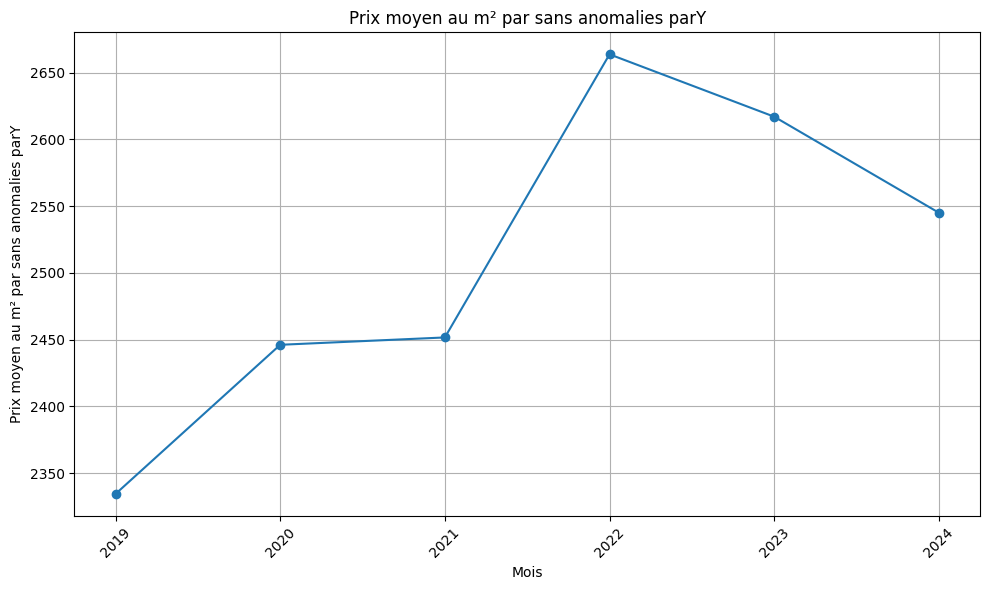

C:\Users\mathe\AppData\Local\Temp\ipykernel_24212\3193673745.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_mutation'] = pd.to_datetime(df['date_mutation'], errors='coerce')
C:\Users\mathe\AppData\Local\Temp\ipykernel_24212\3193673745.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prix_m2'] = df['valeur_fonciere'] / df['surface_reelle_bati']
C:\Users\mathe\AppData\Local\Temp\ipykernel_24212\3193673745.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

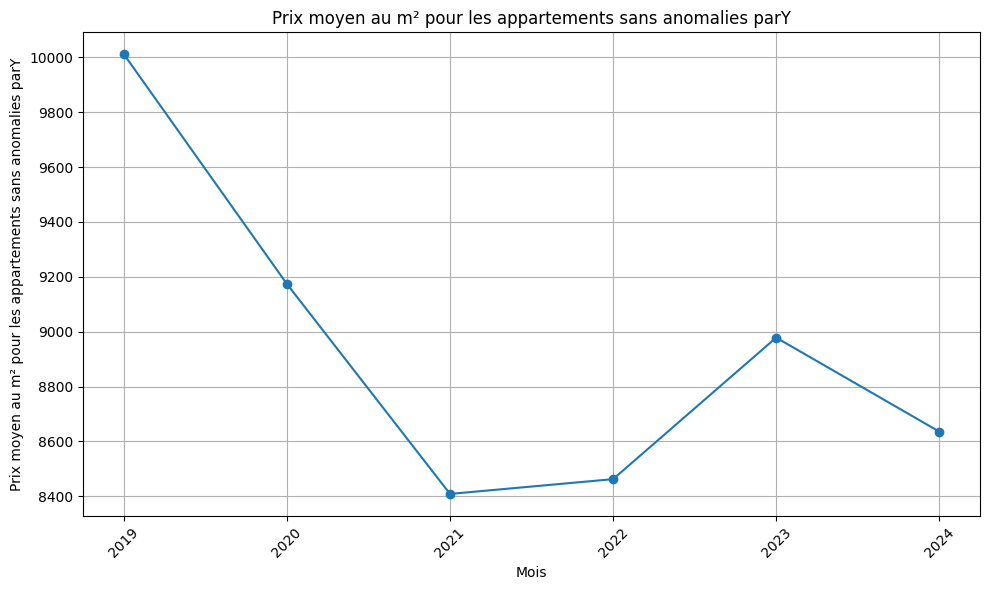

C:\Users\mathe\AppData\Local\Temp\ipykernel_24212\3193673745.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_mutation'] = pd.to_datetime(df['date_mutation'], errors='coerce')
C:\Users\mathe\AppData\Local\Temp\ipykernel_24212\3193673745.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prix_m2'] = df['valeur_fonciere'] / df['surface_reelle_bati']
C:\Users\mathe\AppData\Local\Temp\ipykernel_24212\3193673745.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

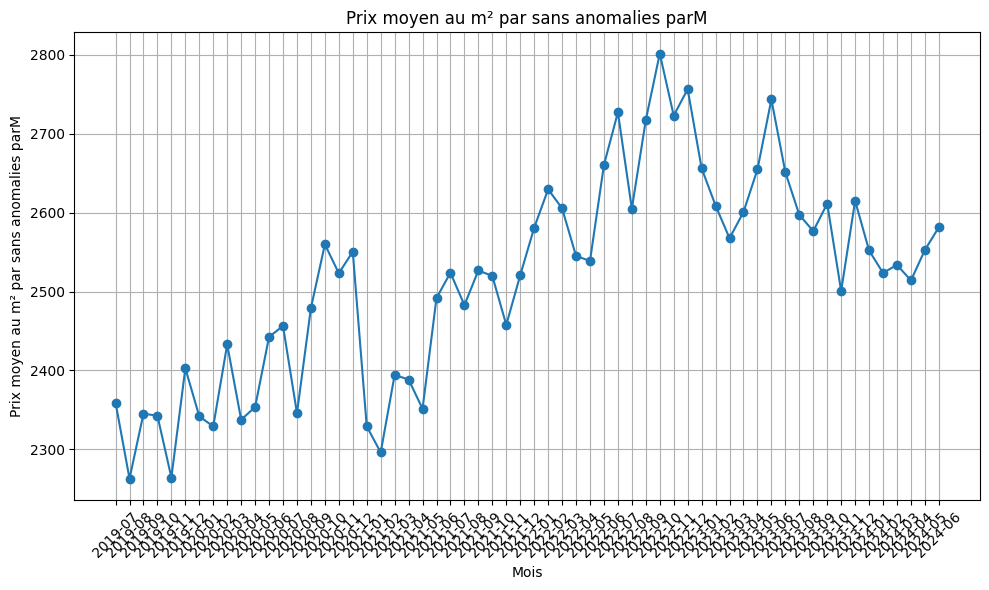

C:\Users\mathe\AppData\Local\Temp\ipykernel_24212\3193673745.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_mutation'] = pd.to_datetime(df['date_mutation'], errors='coerce')
C:\Users\mathe\AppData\Local\Temp\ipykernel_24212\3193673745.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prix_m2'] = df['valeur_fonciere'] / df['surface_reelle_bati']
C:\Users\mathe\AppData\Local\Temp\ipykernel_24212\3193673745.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

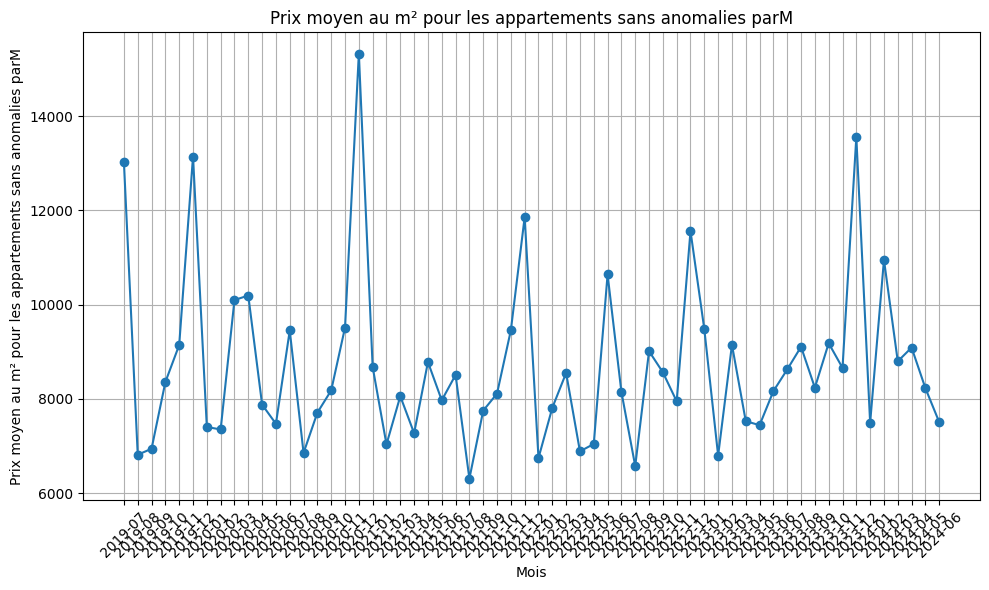

In [ ]:

def enlever_anomalies_quantile(df):
    lower_bound = df['prix_m2'].quantile(0.05)
    upper_bound = df['prix_m2'].quantile(0.95)
    return df[(df['prix_m2'] >= lower_bound) & (df['prix_m2'] <= upper_bound)]
df_maison_normaliser = enlever_anomalies_quantile(df_maison)
df_appartement_normaliser = enlever_anomalies_quantile(df_appartement)
representation_du_prix_metre_carre(df_maison_normaliser, "Prix moyen au m² par sans anomalies par","Y")
representation_du_prix_metre_carre(df_appartement_normaliser, "Prix moyen au m² pour les appartements sans anomalies par","Y")
representation_du_prix_metre_carre(df_maison_normaliser, "Prix moyen au m² par sans anomalies par","M")
representation_du_prix_metre_carre(df_appartement_normaliser, "Prix moyen au m² pour les appartements sans anomalies par","M")



In [14]:
# Trier les données par prix au mètre carré en ordre décroissant
top_50_prix_m2 = df_maison.sort_values(by='prix_m2', ascending=False).head(200)
top_50_prix_m2 = df_appartement_normaliser.sort_values(by='prix_m2', ascending=True).head(200)

# Afficher les colonnes pertinentes
print(top_50_prix_m2[['prix_m2', 'surface_terrain', 'valeur_fonciere']])
print(top_50_prix_m2[['prix_m2', 'surface_terrain', 'valeur_fonciere']])

          prix_m2  surface_terrain  valeur_fonciere
2968762  0.008571           1566.0             1.20
1937691  0.008618              NaN             1.31
750726   0.010256           3230.0             1.20
3475699  0.010811              NaN             2.00
3263884  0.012658              NaN             2.00
...           ...              ...              ...
370528   1.641791              NaN           110.00
78884    1.655738              NaN           101.00
1650119  1.666667            216.0           150.00
3616237  1.666667              NaN           100.00
3701111  1.666667              NaN           100.00

[200 rows x 3 columns]
          prix_m2  surface_terrain  valeur_fonciere
2968762  0.008571           1566.0             1.20
1937691  0.008618              NaN             1.31
750726   0.010256           3230.0             1.20
3475699  0.010811              NaN             2.00
3263884  0.012658              NaN             2.00
...           ...              ...      

          prix_m2  surface_terrain  valeur_fonciere
2968762  0.008571           1566.0             1.20
1937691  0.008618              NaN             1.31
750726   0.010256           3230.0             1.20
3475699  0.010811              NaN             2.00
3263884  0.012658              NaN             2.00
...           ...              ...              ...
370528   1.641791              NaN           110.00
78884    1.655738              NaN           101.00
1650119  1.666667            216.0           150.00
3616237  1.666667              NaN           100.00
3701111  1.666667              NaN           100.00

[200 rows x 3 columns]
          prix_m2  surface_terrain  valeur_fonciere
2968762  0.008571           1566.0             1.20
1937691  0.008618              NaN             1.31
750726   0.010256           3230.0             1.20
3475699  0.010811              NaN             2.00
3263884  0.012658              NaN             2.00
...           ...              ...      